In [1]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.

import pandas as pd
import numpy as np

# Sample DataFrame with missing values, duplicates, and outliers
data = {
    'A': [1, 2, 3, None, 5, 5, 5, 6, 100],
    'B': [10, 20, 30, 40, None, 50, 50, 60, 200],
    'C': [5, None, 15, 20, 25, 25, 30, None, 1000]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# ------------------------------------------
# 1. Handle Missing Values
# ------------------------------------------
# Use forward fill for column 'A' and 'B', and fill 'C' with the median value
df['A'] = df['A'].ffill()  # Forward-fill for 'A'
df['B'] = df['B'].ffill()  # Forward-fill for 'B'
df['C'] = df['C'].fillna(df['C'].median())  # Fill missing 'C' with median

# ------------------------------------------
# 2. Remove Duplicates
# ------------------------------------------
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# ------------------------------------------
# 3. Handle Outliers
# ------------------------------------------
# Using IQR method to detect and remove outliers for all columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter the data to remove rows with outliers
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)


Original DataFrame:
       A      B       C
0    1.0   10.0     5.0
1    2.0   20.0     NaN
2    3.0   30.0    15.0
3    NaN   40.0    20.0
4    5.0    NaN    25.0
5    5.0   50.0    25.0
6    5.0   50.0    30.0
7    6.0   60.0     NaN
8  100.0  200.0  1000.0

Cleaned DataFrame:
     A     B     C
1  2.0  20.0  25.0
2  3.0  30.0  15.0
3  3.0  40.0  20.0
4  5.0  40.0  25.0
5  5.0  50.0  25.0
6  5.0  50.0  30.0
7  6.0  60.0  25.0


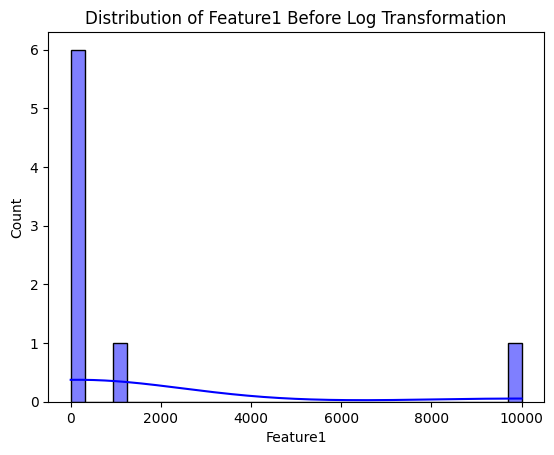

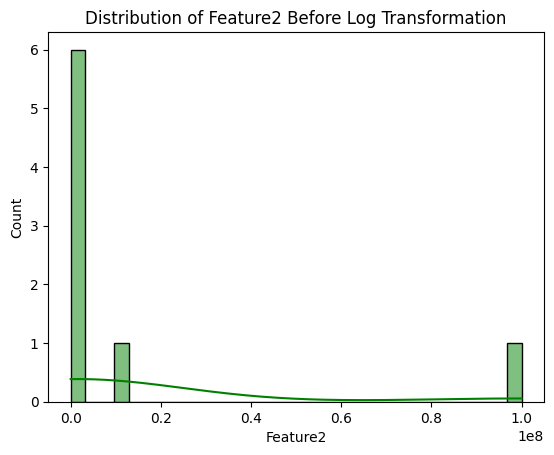

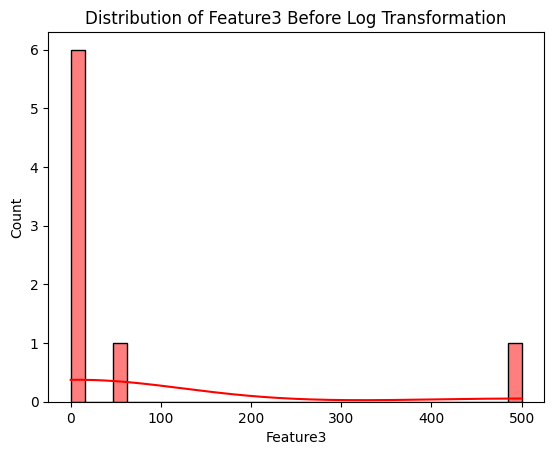

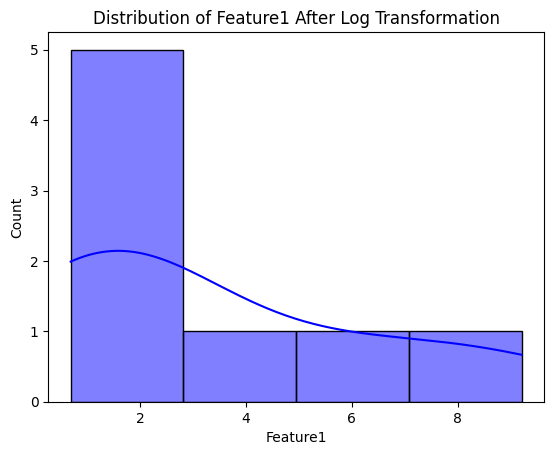

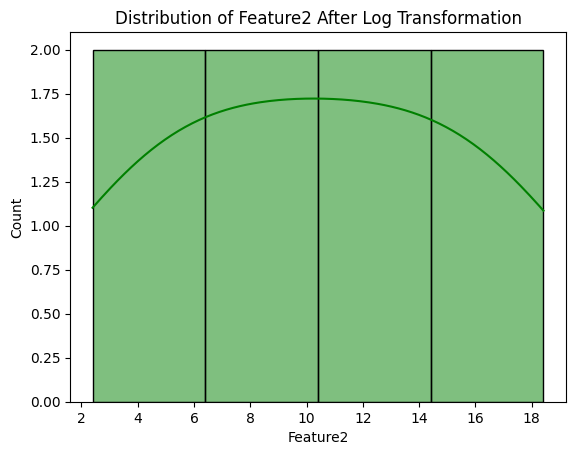

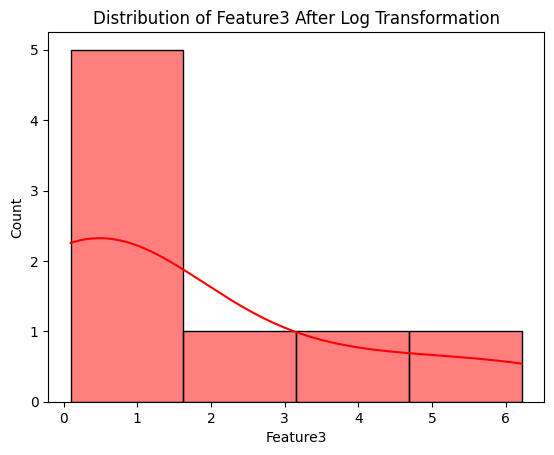

In [2]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with skewness
data = {
    'Feature1': [1, 2, 3, 4, 5, 100, 1000, 10000],
    'Feature2': [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
    'Feature3': [0.1, 0.2, 0.3, 0.4, 0.5, 5.0, 50.0, 500.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the distribution before transformation
sns.histplot(df['Feature1'], kde=True, color='blue')
plt.title('Distribution of Feature1 Before Log Transformation')
plt.show()

sns.histplot(df['Feature2'], kde=True, color='green')
plt.title('Distribution of Feature2 Before Log Transformation')
plt.show()

sns.histplot(df['Feature3'], kde=True, color='red')
plt.title('Distribution of Feature3 Before Log Transformation')
plt.show()

# -----------------------------------------
# Apply Log Transformation to Skewed Data
# -----------------------------------------
# Apply log(x+1) transformation to handle zeros and negatives
df['Feature1'] = np.log(df['Feature1'] + 1)
df['Feature2'] = np.log(df['Feature2'] + 1)
df['Feature3'] = np.log(df['Feature3'] + 1)

# Plot the distribution after transformation
sns.histplot(df['Feature1'], kde=True, color='blue')
plt.title('Distribution of Feature1 After Log Transformation')
plt.show()

sns.histplot(df['Feature2'], kde=True, color='green')
plt.title('Distribution of Feature2 After Log Transformation')
plt.show()

sns.histplot(df['Feature3'], kde=True, color='red')
plt.title('Distribution of Feature3 After Log Transformation')
plt.show()

In [3]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction amodels.


import pandas as pd

# Sample DataFrame
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Experience': [2, 5, 10, 12, 18],
    'City': ['New York', 'San Francisco', 'Chicago', 'Boston', 'Los Angeles']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# -------------------------------------
# Feature Engineering: Creating New Features
# -------------------------------------

# 1. Create a new feature: 'Salary per Year of Experience' (Salary / Experience)
df['Salary_per_Experience'] = df['Salary'] / df['Experience']

# 2. Create a new feature: 'Age Group' (Categorical feature based on Age)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50], labels=['Young', 'Middle-Aged', 'Old'])

# 3. Create a new feature: 'Experience to Salary Ratio'
df['Experience_to_Salary_Ratio'] = df['Experience'] / df['Salary']

# 4. Create a new feature: 'Log of Salary' (helps with highly skewed distributions)
df['Log_Salary'] = df['Salary'].apply(lambda x: pd.np.log(x))

# 5. Create a new feature: 'Is High Salary' (Binary feature: 1 if Salary > 75,000, else 0)
df['Is_High_Salary'] = df['Salary'].apply(lambda x: 1 if x > 75000 else 0)

# Display the new DataFrame with added features
print("\nDataFrame After Feature Engineering:")
print(df)

Original DataFrame:
   Age  Salary  Experience           City
0   25   50000           2       New York
1   30   60000           5  San Francisco
2   35   70000          10        Chicago
3   40   80000          12         Boston
4   45   90000          18    Los Angeles


AttributeError: module 'pandas' has no attribute 'np'

In [ ]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.




In [ ]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.


